In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/exportaciones.csv', sep=';')

## Preprocesado de datos

In [3]:
df

,AÑO,MES,SECTOR,PAIS,FOB (MILES USD),TONELADAS
0,2017,1,ACUACULTURA,ALBANIA,384.61980,65.7800
1,2017,1,ACUACULTURA,ALEMANIA,2081.33714,203.3293
2,2017,1,ACUACULTURA,ARABIA SAUDITA,498.39136,40.6728
3,2017,1,ACUACULTURA,ARGENTINA,42.32840,4.0000
4,2017,1,ACUACULTURA,BÉLGICA,1718.90932,190.0052
...,...,...,...,...,...,...
52421,2022,8,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",TAILANDIA,2.44200,0.0180
52422,2022,8,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",TAIWÁN,0.78300,0.0016
52423,2022,8,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",TURQUÍA,169.51881,15.2750
52424,2022,8,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",URUGUAY,9.16761,0.1876


El dataset presentado contiene la siguiente información.
    - AÑO y MES: De cuando se realizó en envío.
    - SECTOR: Tipo de mercancía transportada.
    - PAIS: Destino de la mercancía.
    - FOB: Siglas de 'free on board'. Valor en USD de la mercancía incluyendo el coste de movilización y    cargos de aduana.

In [4]:
# Se llevan las columnas de año y mes a formato de fecha
df['FECHA'] = df['MES'].astype("str") + "-" + df['AÑO'].astype("str")
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.drop(columns=['AÑO', 'MES'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52426 entries, 0 to 52425
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SECTOR           52426 non-null  object        
 1   PAIS             52426 non-null  object        
 2   FOB (MILES USD)  52426 non-null  float64       
 3   TONELADAS        52426 non-null  float64       
 4   FECHA            52426 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.0+ MB


In [6]:
df.rename(columns = {'FOB (MILES USD)':'FOB'}, inplace = True)
df['FOB'] = (df['FOB'] * 1000).round()

In [7]:
df

,SECTOR,PAIS,FOB,TONELADAS,FECHA
0,ACUACULTURA,ALBANIA,384620.0,65.7800,2017-01-01
1,ACUACULTURA,ALEMANIA,2081337.0,203.3293,2017-01-01
2,ACUACULTURA,ARABIA SAUDITA,498391.0,40.6728,2017-01-01
3,ACUACULTURA,ARGENTINA,42328.0,4.0000,2017-01-01
4,ACUACULTURA,BÉLGICA,1718909.0,190.0052,2017-01-01
...,...,...,...,...,...
52421,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",TAILANDIA,2442.0,0.0180,2022-08-01
52422,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",TAIWÁN,783.0,0.0016,2022-08-01
52423,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",TURQUÍA,169519.0,15.2750,2022-08-01
52424,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",URUGUAY,9168.0,0.1876,2022-08-01


## Agrupación de datos

### Valor de las exportaciones por año

In [8]:
df_anual = df.groupby(pd.Grouper(key="FECHA",freq="Y"))["FOB"].sum().reset_index()
df_anual['FOB'] = (df_anual['FOB'] / 1e+09).round(1)
df_anual

,FECHA,FOB
0,2017-12-31,12.2
1,2018-12-31,12.8
2,2019-12-31,13.6
3,2020-12-31,15.0
4,2021-12-31,17.7
5,2022-12-31,14.1


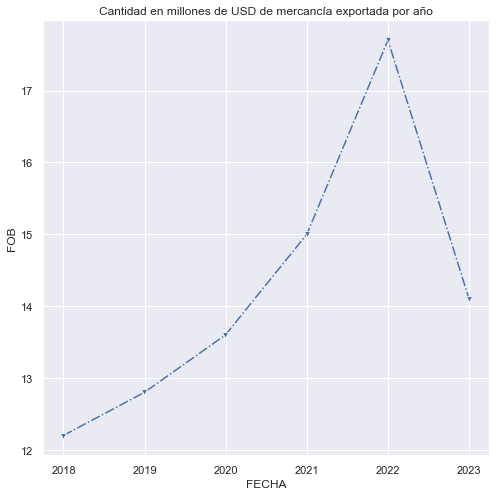

In [9]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=df_anual, x = "FECHA", y = "FOB",ax = ax, marker = "v", linestyle="-.")
_=ax.set_title("Cantidad en millones de USD de mercancía exportada por año")

### Valor de las exportaciones (millones de USD) por sector

In [10]:
df_sectores = df.groupby(['SECTOR'])["FOB"].sum().reset_index()
df_sectores['FOB'] = (df_sectores['FOB'] / 1e+09).round(1)
df_sectores

,SECTOR,FOB
0,ACUACULTURA,24.1
1,AGROINDUSTRIA,2.9
2,ALIMENTOS PROCESADOS,2.4
3,"ARTESANÍAS, SOMBREROS Y BOTONES DE TAGUA",0.2
4,AUTOMOTRIZ,0.5
5,BANANO Y PLÁTANO,18.9
6,CACAO Y ELABORADOS,4.6
7,CAFÉ Y ELABORADOS,0.5
8,CONFECCION Y TEXTIL,0.3
9,CUERO Y CALZADO,0.2


### Valor de las exportaciones (miles de USD) por país

In [11]:
df_paises = df.groupby(['PAIS'])["FOB"].sum().reset_index()
df_paises['FOB'] = (df_paises['FOB'] / 1e+03).round(1)
df_paises = df_paises.sort_values(by="FOB", ascending = False).reset_index(drop=True)
df_paises

,PAIS,FOB
0,ESTADOS UNIDOS,17672559.5
1,CHINA,14050665.8
2,RUSIA,5114904.6
3,COLOMBIA,4694872.5
4,ESPAÑA,3693828.9
...,...,...
183,ANDORRA,2.3
184,BURKINA FASO,1.9
185,UGANDA,0.3
186,NEPAL,0.2


### Promedio de toneladas de mercancías por sector

In [12]:
df_ton = df.groupby(['SECTOR'])["TONELADAS"].mean().reset_index()
df_ton = df_ton.sort_values(by="TONELADAS", ascending = False).reset_index(drop=True)
df_ton

,SECTOR,TONELADAS
0,BANANO Y PLÁTANO,9596.866925
1,MINERÍA,1801.093237
2,FORESTAL Y PRODUCTOS ELABORADOS,1590.664918
3,ACUACULTURA,1479.616071
4,AGROINDUSTRIA,972.992743
5,METALMECÁNICO,790.774725
6,CACAO Y ELABORADOS,778.129259
7,PESCA,715.753004
8,FRUTAS NO TRADICIONALES,557.283492
9,ALIMENTOS PROCESADOS,424.479266
